In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df_tracks= pd.read_csv("artists.csv")
df_tracks.head(2)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0


In [6]:
# checking null values, this would give  a sum of all null values in every column
pd.isnull(df_tracks).sum()

id             0
followers     13
genres         0
name           0
popularity     0
dtype: int64

In [7]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1048575 non-null  object 
 1   followers   1048562 non-null  float64
 2   genres      1048575 non-null  object 
 3   name        1048575 non-null  object 
 4   popularity  1048575 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


In [10]:
# this would give top 10 least popular songs
sorted_df=df_tracks.sort_values("popularity",ascending=True).head(10)
sorted_df

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
589627,2mvmH8gGjH0cHncgAGakf0,16.0,[],Jessie Reed,0
589628,3eEInmCLeDNwtW0Sa7qqPG,0.0,[],Brita,0
589629,7bCX94xPcxOs4CjQ86lyEw,2.0,[],D.J.R,0
589630,2Y9DeeC3X52pa81d88lFEo,13.0,[],Tracid Posse,0
589631,0WX3TPctnmgon464Hr7fZB,0.0,[],Middle of Reality,0
589632,6wYnS3BfSM68oKgvD7uSQJ,3.0,[],La Marche de la Lune,0
589638,01OCVaEVgo7PGLiobBTlmo,32.0,[],Dominic Hauser,0
589624,6pRyD1XWQRLhJFvR22XO6U,0.0,[],Time Whitehead Quartet,0
589640,3lYp6nnNbR7qbmtlMsD88c,19.0,[],Sam Brady Long,0


In [12]:
# gives us the count mean standard deviation
df_tracks.describe()

,followers,popularity
count,1.048562e+06,1.048575e+06
mean,1.126694e+04,9.258299e+00
std,2.677906e+05,1.392614e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,6.000000e+01,2.000000e+00
75%,4.650000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [15]:
# gives the list of 10 most popular songs of popularity greater than 90, inplace =false will not change or data frame and keep it same, ascending false means in descending order
most_popular=df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
144483,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",The Weeknd,96
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96
115490,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"['chicago rap', 'melodic rap']",Juice WRLD,96
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
144487,6M2wZ9GZgrQXHCFfjv46we,24123468.0,"['dance pop', 'pop', 'uk pop']",Dua Lipa,95
144486,1vyhD5VmyZ7KMfW5gqLgo5,27286822.0,"['latin', 'reggaeton', 'reggaeton colombiano',...",J Balvin,95


C:\Users\Biky Roy\AppData\Local\Temp\ipykernel_23064\4123080769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df_tracks.corr(method="pearson")


[Text(0.5, 0, 'followers'), Text(1.5, 0, 'popularity')]

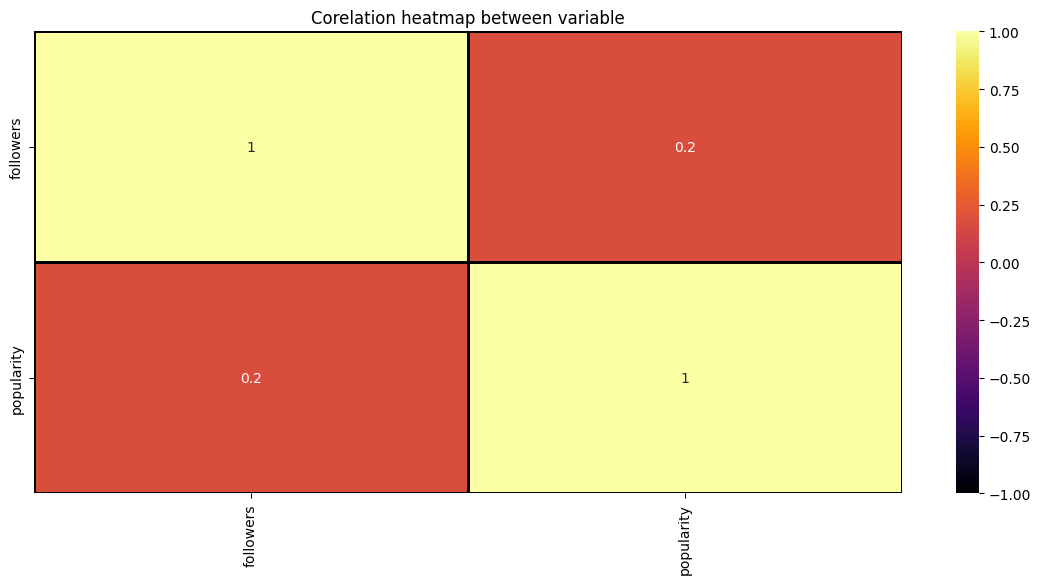

In [9]:
# doing coorelation
corr_df=df_tracks.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="inferno",linewidths=1,linecolor="Black")
heatmap.set_title("Corelation heatmap between variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

[Text(0.5, 1.0, 'Pop vs Followers')]

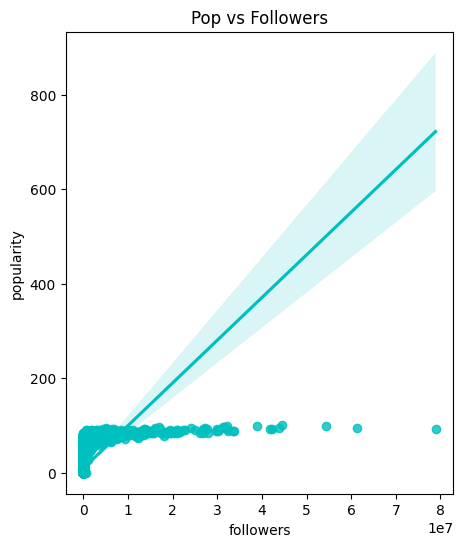

In [13]:
df_genre=pd.read_csv("SpotifyFeatures.csv")

In [21]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
